# Datium - Sold Amount Prediction

## Import Training Data

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DatiumTrain.rpt', delimiter='\t')

In [3]:
df.shape

(50704, 130)

* Dataset contains 50,704 number of rows and 130 number of columns

In [4]:
df.columns

Index(['Make', 'Model', 'MakeCode', 'FamilyCode', 'YearGroup', 'MonthGroup',
       'SequenceNum', 'Description', 'CurrentRelease', 'ImportFlag',
       ...
       'PrivateMax', 'NewPrice', 'Colour', 'Branch', 'SaleCategory',
       'Sold_Date', 'Compliance_Date', 'Age_Comp_Months', 'KM', 'Sold_Amount'],
      dtype='object', length=130)

## EDA report using sweetviz

In [5]:
#when generating EDA report, 'EngineDescription' gives an error. Fixing the error here
df['EngineDescription'] = pd.to_numeric(df['EngineDescription'], errors='coerce')

In [6]:
!pip install sweetviz

You should consider upgrading via the '/Users/ttg/pyenv/bin/python3 -m pip install --upgrade pip' command.


In [7]:
import sweetviz as sv

In [8]:
def generate_EDA_report(df, report_name):
    print('data is being analyzed')
        
    report = sv.analyze(df)
        
    file_name = '{report_name}_EDA_report.html'.format(report_name=report_name)
        
    report.show_html(filepath=file_name, open_browser=True)
    print("Done")

In [9]:
generate_EDA_report(df, 'DatiumTrain1')

data is being analyzed


                                             |          | [  0%]   00:00 -> (? left)

Report DatiumTrain1_EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Done


* Looking at the EDA report, There are columns which contain more 90% of null values.(eg: 'BadgeSecondaryDescription', 'BodyConfigDescription', 'WheelBaseConfig', and 'Roofline' etc.)

* In this modeling exercise, Our target variable is 'Sold_Amount', It also contains 4 null values

## Feature Selection and Engineering

* Based on correlation values showed in the EDA report and my domain knowledge, I have choosen following columns to continue the model building

* This problem belongs to the class of regression

In [6]:
predictors = ['NewPrice','KerbWeight','Age_Comp_Months','KM'
              ,'RearRimDesc','VFactsPrice','Make']

target = ['Sold_Amount']

In [7]:
df2 = df[predictors+target]

In [8]:
df2.head(10)

,NewPrice,KerbWeight,Age_Comp_Months,KM,RearRimDesc,VFactsPrice,Make,Sold_Amount
0,34790.0,1690.0,93.0,227878.0,16x7.0,< $70K,Holden,2000.0
1,27978.0,1380.0,86.0,153091.0,15x6.0,< $70K,Holden,6800.0
2,31990.0,1545.0,16.0,27374.0,17x6.5,< $60K,Toyota,22900.0
3,35990.0,1576.0,48.0,99452.0,15x6.0,< $70K,Holden,10500.0
4,49490.0,1725.0,28.0,44355.0,16x6.5,< $60K,Toyota,31320.0
5,32490.0,1485.0,50.0,93021.0,15x6.0,< $70K,Toyota,8600.0
6,32340.0,1637.0,112.0,245876.0,15x6.0,< $70K,Holden,5600.0
7,35555.0,1648.0,41.0,60255.0,16x6.5,< $70K,Ford,11825.0
8,42760.0,1330.0,100.0,144758.0,15x6.5,NaN,Mazda,7200.0
9,34520.0,1356.0,88.0,132669.0,15x6.0,< $70K,Holden,8500.0


In [9]:
df2.describe(percentiles=[.01,.05,.1,.2,.25, .5, .75, 0.8,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,20%,25%,50%,75%,80%,90%,95%,99%,max
NewPrice,50703.0,36726.014555,15522.567237,5157.0,15600.38,19990.0,22990.0,27405.2,29500.0,34990.0,41260.0,43040.0,50140.0,56990.0,86999.80,525000.0
KerbWeight,49170.0,1583.991499,282.673958,640.0,961.00,1085.0,1250.0,1380.0,1440.0,1574.0,1713.0,1757.0,1940.0,2090.0,2370.00,3222.0
Age_Comp_Months,50659.0,45.775223,32.153830,0.0,8.00,13.0,16.0,24.0,26.0,38.0,54.0,61.0,85.0,110.0,163.00,1279.0
KM,50702.0,84954.058479,72837.320753,0.0,5087.10,14887.2,22558.4,36386.0,40854.0,68469.0,116540.0,129390.8,166143.5,200218.7,279671.95,8883234.0
Sold_Amount,50700.0,16401.722226,10312.029249,0.0,0.00,3400.0,6100.0,9400.0,10500.0,15000.0,20425.0,22100.0,27000.0,32800.0,50750.00,317000.0


* Counts of each features does not match with shape of the dataset means that there are null values

### Target Variable(y)

Text(0.5, 1.0, 'Sold Amount')

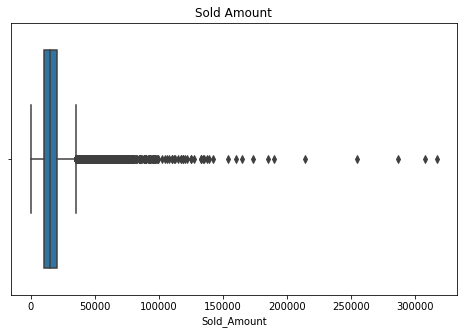

In [10]:
fig = plt.figure(figsize=(8,5))
sns.boxplot('Sold_Amount',data=df2).set_title('Sold Amount')

* Assumed that vehicle sold amounts are  geater than 1

In [11]:
df3=df2[df2['Sold_Amount']>1]
df3 = df3[df3['Sold_Amount'].notna()]

Text(0.5, 1.0, 'Sold Amount')

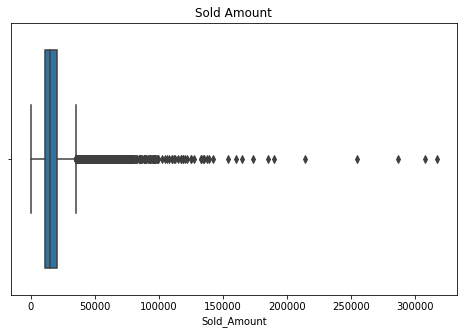

In [12]:
fig = plt.figure(figsize=(8,5))
sns.boxplot('Sold_Amount',data=df3).set_title('Sold Amount')

### Predictor Variables(x)

### a) NewPrice

* Replace mising values by median(since the distibution is skewed), if any

In [13]:
df3['NewPrice'].fillna(df3['KM'].median(), inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

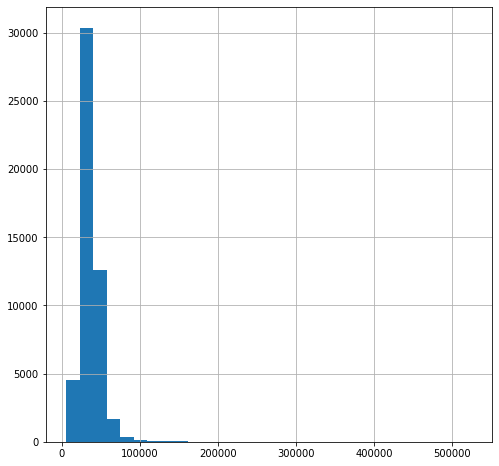

In [14]:
df3['NewPrice'].hist(figsize = (8,8),bins =30)
plt.show

* I keep this feature as it is.

### b) KM

<function matplotlib.pyplot.show(close=None, block=None)>

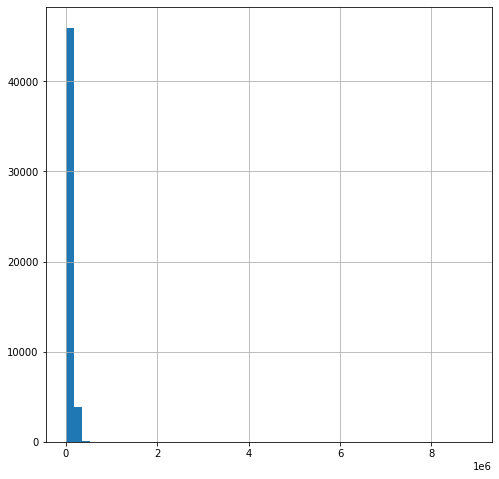

In [15]:
df3['KM'].hist(figsize = (8,8),bins =50)
plt.show

* Replace missing value of KM by it's median(since the distibution is skewed)

In [16]:
df3['KM'].fillna(df3['KM'].median(), inplace=True)

* Grouping the KM variable 

In [17]:
df3["KM_group"] = pd.cut(df3['KM'],bins=[-1, 20000, 50000, 100000, 150000, 200000, 10000000],
                                    labels=['20K', '50K', '100K', '150K', '200K', '+200K'])

In [18]:
df3["KM_group"].value_counts(dropna=False)

100K     16527
50K      13209
150K      9206
200K      4332
20K       4164
+200K     2527
Name: KM_group, dtype: int64

<AxesSubplot:xlabel='KM_group', ylabel='count'>

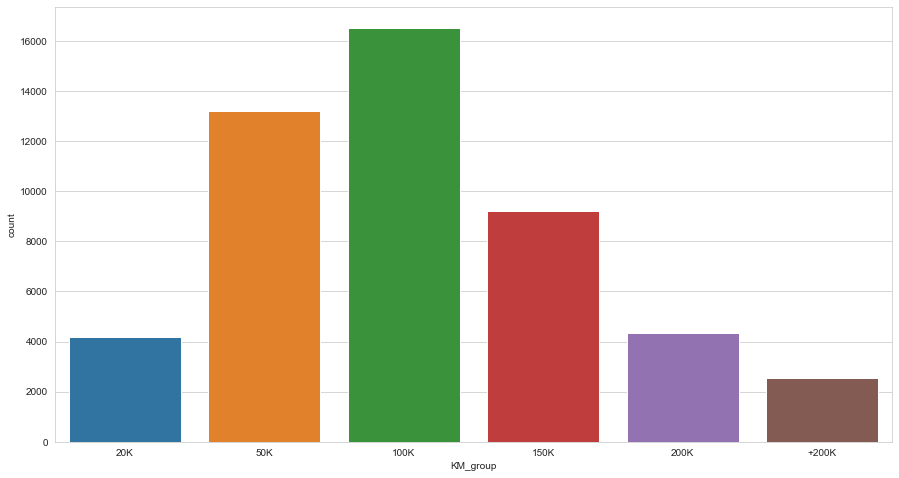

In [19]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='KM_group', data=df3)

### c) KerbWeight

Text(0.5, 1.0, 'KerbWeight')

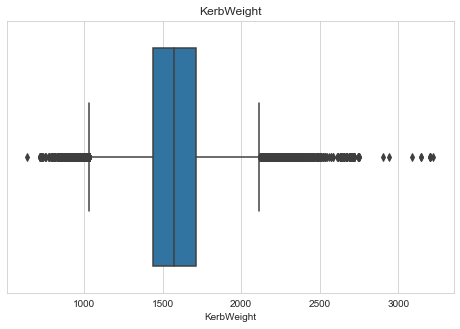

In [20]:
fig = plt.figure(figsize=(8,5))
sns.boxplot('KerbWeight',data=df3).set_title('KerbWeight')

* Replace missing value by mean

In [21]:
df3['KerbWeight'].fillna(df3['KerbWeight'].mean(), inplace=True)

### d) Age_Comp_Months

Text(0.5, 1.0, 'Age_Comp_Months')

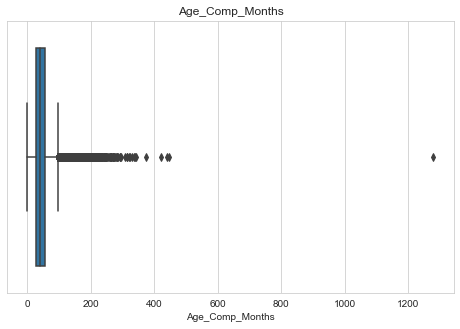

In [22]:
fig = plt.figure(figsize=(8,5))
sns.boxplot('Age_Comp_Months',data=df3).set_title('Age_Comp_Months')

* Replace missing value by median value

In [23]:
df3['Age_Comp_Months'].fillna(df3['Age_Comp_Months'].median(), inplace=True)

* Capping Age_Comp_Months at 100 ,90% of values in between 0 and 85

In [24]:
def capping_Age_Comp_Months(x):
    value = 0

    if x <=100:
        value = x
    else:
        value = 100
    return value

In [25]:
df3['Age_Comp_Months_cap'] = df3['Age_Comp_Months'].apply(lambda x: capping_Age_Comp_Months(x))

Text(0.5, 1.0, 'Age_Comp_Months_cap')

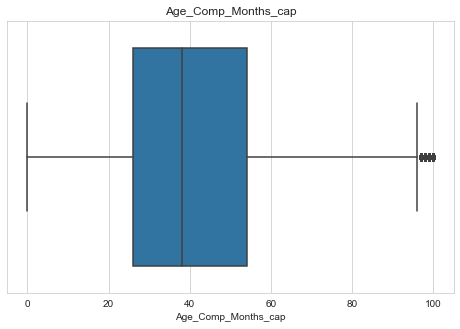

In [26]:
fig = plt.figure(figsize=(8,5))
sns.boxplot('Age_Comp_Months_cap',data=df3).set_title('Age_Comp_Months_cap')

### e) Make

#### Average sold amount by Make categories

In [27]:
df3.groupby('Make')['Sold_Amount'].aggregate(['count', 'mean']).sort_values(['mean'], ascending=False).reset_index()

,Make,count,mean
0,Ferrari,1,317000.000000
1,Bentley,1,308000.000000
2,Aston Martin,3,202333.333333
3,Lamborghini,3,150666.666667
4,Lotus,2,79750.000000
5,Maserati,4,69062.500000
6,Porsche,34,67526.470588
7,Lexus,266,46123.588534
8,Hummer,8,37262.500000
9,Mercedes-Benz,454,31610.414097


* Generate new categories by grouping existing categories based on average sold amount

In [28]:
def categorize_make(x):
    cat = ''
    
    if x in ['Ferrari','Bentley']:
        cat = 'A'
    elif x in ['Aston Martin','Lamborghini']:
        cat = 'B'
    elif x in ['Lotus','Maserati','Porsche']:
        cat = 'C'
    elif x in ['Lexus','Hummer','Mercedes-Benz']:
        cat = 'D'
    elif x in ['Audi','Land Rover','Volvo','Jaguar','Fiat']:
        cat = 'E'
    elif x in ['Opel','Isuzu','MINI','Toyota','Subaru','SKODA','Nissan','Renault','Chrysler','Daimler','Volkswagen','Jeep','Dodge','Honda','Holden','Rover','Peugeot','Saab','Ford','Mazda','Mitsubishi','Eunos','Hyundai','Alfa Romeo','SsangYong']:
        cat = 'F'
    elif x in ['smart','Suzuki','Citroen','De Tomaso','Seat','Great Wall','Pontiac','Daihatsu','Daewoo','Proton','Chery','Tata']:
        cat = 'G'
    else:
        cat = 'Other'
        
    return cat

In [29]:
df3['Make'] = df3['Make'].replace(nan, 'Not avialable')
df3['Make_cat'] = df3['Make'].apply(lambda x: categorize_make(x))

In [30]:
df3['Make_cat'].value_counts(dropna=False)

F    48224
D      728
G      554
E      411
C       40
B        6
A        2
Name: Make_cat, dtype: int64

In [31]:
df3.groupby('Make_cat')['Sold_Amount'].aggregate(['count', 'mean']).sort_values(['mean'], ascending=False).reset_index()

,Make_cat,count,mean
0,A,2,312500.000000
1,B,6,176500.000000
2,C,40,68291.250000
3,D,728,36975.415591
4,E,411,25746.095109
5,F,48224,16289.178806
6,G,554,7441.443141


### f) RearRimDesc

#### Average sold amount by RearRimDesc categories

In [32]:
df3.groupby('RearRimDesc')['Sold_Amount'].aggregate(['count', 'mean']).sort_values(['mean'], ascending=False).reset_index()

,RearRimDesc,count,mean
0,18x12.0,2,204500.000000
1,21x9.5,1,165000.000000
2,19x9.5,9,139027.777778
3,19x11.0,5,133200.000000
4,15x12.0,1,120000.000000
...,...,...,...
77,16x6.5F,1,5000.000000
78,13x4.5,156,4896.307692
79,13x5.5,15,4495.000000
80,14x6.5,5,3660.000000


* Generate new categories by grouping existing categories based on average sold amount

In [33]:
def categorize_RearRimDesc(x):
    cat = ''
    
    if x in ['18x12.0','21x9.5','19x9.5','19x11.0','15x12.0','19x10']:
        cat = 'A'
    elif x in ['20x9.5','21x10.0','18x9.5','20x8.5','18x10.5','19x10.0','18x9.0','19x9.0','19x7.5J','20x10.0','21x9.0','20x9.0']:
        cat = 'B'
    elif x in ['18x8.5','17x8.5','19x8.5','18x11.0','18x10.0','19x10.5','18x8.5J','19x7.5','15x7.5','18x7.5J','17x9.0','20x8.0','16x5.5 (dual)','18x8.25','18x7.5','16x7.5','19x8.25','16x8.5']:
        cat = 'C'
    elif x in ['19x8.0','17x6.0','16x5.5','20x7.5','19x7.0','16x8.0','16x5.0 (dual)','18x8.0','17x8.0','17x7.5','18x6.5','17x7.0J','18x7.0','17x7.5J','17x7.0','16x5.5F Split','17x6.5','16x6.5J','16x5.0','12x4.0 (dual)','16x6.0','16x7.0','15x7.0','15x6.0J','16x6.5','15x6.0','15x6.5','15x5.0','15x5.5 (dual)','15x5.5','14x5.5','390x180mm TD','17x5.5']:
        cat = 'D'
    elif x in ['14x5.0','14x7.0','15x5.5F Split','14x4.5','13x5.0','15x7.0 PLT','14x6.0','13x4.0','16x6.5F','13x4.5','13x5.5','14x6.5','12x4.0']:
        cat = 'E'
    else:
        cat = 'Other'
        
    return cat

In [34]:
df3['RearRimDesc'] = df3['RearRimDesc'].replace(nan, 'Not avialable')
df3['RearRimDesc_cat'] = df3['RearRimDesc'].apply(lambda x: categorize_RearRimDesc(x))

In [35]:
df3['RearRimDesc_cat'].value_counts(dropna=False)

D        46178
E         2137
C          823
Other      724
B           84
A           19
Name: RearRimDesc_cat, dtype: int64

In [36]:
df3.groupby('RearRimDesc_cat')['Sold_Amount'].aggregate(['count', 'mean']).sort_values(['mean'], ascending=False).reset_index()

,RearRimDesc_cat,count,mean
0,A,19,142960.526316
1,B,84,68820.654762
2,C,823,36857.427278
3,D,46178,16600.286046
4,Other,724,11618.930097
5,E,2137,8309.009738


### g) VFactsPrice

#### Average sold amount by VFactsPrice categories

In [37]:
df3.groupby('VFactsPrice')['Sold_Amount'].aggregate(['count', 'mean']).sort_values(['mean'], ascending=False).reset_index()

,VFactsPrice,count,mean
0,> $200K,27,120111.111111
1,> $100K,71,50195.774648
2,> $80K,126,46577.936508
3,> $70K,401,37365.570175
4,< $100K,1571,28657.314481
5,> $60K,343,28051.341137
6,< 20 seats,280,24367.796429
7,< $80K,358,20398.698045
8,> $40K,81,19711.481481
9,< $60K,7523,16746.558571


* Generate new categories by grouping existing categories based on average sold amount

In [38]:
def categorize_VFactsPrice(x):
    cat = ''
    
    if x in ['> $200K']:
        cat = 'A'
    elif x in ['> $100K']:
        cat = 'B'
    elif x in ['> $80K','> $70K','< $100K','> $60K','< 20 seats','< $80K']:
        cat = 'C'
    elif x in ['> $40K','< $60K','< $70K','2.5t-3.5t','> $25K','< $40K']:
        cat = 'D'
    elif x in ['<= 2.5t','< $25K','Micro']:
        cat = 'E'
    else:
        cat = 'Other'
        
    return cat

In [39]:
df3['VFactsPrice'] = df3['VFactsPrice'].replace(nan, 'Not avialable')
df3['VFactsPrice_cat'] = df3['VFactsPrice'].apply(lambda x: categorize_VFactsPrice(x))

In [40]:
df3['VFactsPrice_cat'].value_counts(dropna=False)

D        34458
Other    10221
C         3079
E         2109
B           71
A           27
Name: VFactsPrice_cat, dtype: int64

In [41]:
df3.groupby('VFactsPrice_cat')['Sold_Amount'].aggregate(['count', 'mean']).sort_values(['mean'], ascending=False).reset_index()

,VFactsPrice_cat,count,mean
0,A,27,120111.111111
1,B,71,50195.774648
2,C,3079,29106.976811
3,D,34458,16016.776412
4,Other,10221,15920.445721
5,E,2109,9725.498791


### Define Categorical and Numertical Predictors

In [42]:
cat_predictors = ['Make_cat', 'RearRimDesc_cat','VFactsPrice_cat', 'KM_group']
int_predictors = ['NewPrice', 'KerbWeight', 'Age_Comp_Months_cap']

In [43]:
df4 = df3[cat_predictors+int_predictors+target].reset_index(drop=True)

In [44]:
df4.shape

(49965, 8)

In [45]:
df4.head(10)

,Make_cat,RearRimDesc_cat,VFactsPrice_cat,KM_group,NewPrice,KerbWeight,Age_Comp_Months_cap,Sold_Amount
0,F,D,D,+200K,34790.0,1690.0,93.0,2000.0
1,F,D,D,200K,27978.0,1380.0,86.0,6800.0
2,F,D,D,50K,31990.0,1545.0,16.0,22900.0
3,F,D,D,100K,35990.0,1576.0,48.0,10500.0
4,F,D,D,50K,49490.0,1725.0,28.0,31320.0
5,F,D,D,100K,32490.0,1485.0,50.0,8600.0
6,F,D,D,+200K,32340.0,1637.0,100.0,5600.0
7,F,D,D,100K,35555.0,1648.0,41.0,11825.0
8,F,D,Other,150K,42760.0,1330.0,100.0,7200.0
9,F,D,D,150K,34520.0,1356.0,88.0,8500.0


## Encoode Categorical variable using One hot encoding

* Define a function to identify and save the unique categories in each categorical predictors to a dictionary

In [46]:
def update_cat_dict(cleansed_df, cat_col):
    dictnry = {}
    for col in cat_col:
        lables = list(cleansed_df[col].unique())
        dictnry[col] = sorted(lables)
    return dictnry

* Define a function to encode categorical variable using unique categories

In [47]:
def onehot_encode_cat_variable(df, cat_var_list, dictn):
    new_encoded_col = []
    for var in cat_var_list:
        temp_var = dictn[var]
        #temp_var.pop(len(temp_var)-1)
        for cat in temp_var:
            df['%s_%s' % (var.lower(), cat.replace(" ", "").lower())] = 0
            df['%s_%s' % (var.lower(), cat.replace(" ", "").lower())] = df[var].apply(
                lambda x: (x.lower() == cat.lower()) * 1)
            new_encoded_col.append('%s_%s' % (var.lower(), cat.replace(" ", "").lower()))

    return df, new_encoded_col

Note: If we want we can use label encoder given by sklearn, but I prefer one-hot-encoding over label encoder  

### Save unique categories in each categorical feature as a dictionary

In [48]:
dic = update_cat_dict(df4, cat_predictors)

In [49]:
dic

{'Make_cat': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
 'RearRimDesc_cat': ['A', 'B', 'C', 'D', 'E', 'Other'],
 'VFactsPrice_cat': ['A', 'B', 'C', 'D', 'E', 'Other'],
 'KM_group': ['+200K', '100K', '150K', '200K', '20K', '50K']}

### Encoding

In [50]:
encoded_df, new_encode_predictors = onehot_encode_cat_variable(df4, cat_predictors, dic)

In [51]:
encoded_df[new_encode_predictors+int_predictors+target]

,make_cat_a,make_cat_b,make_cat_c,make_cat_d,make_cat_e,make_cat_f,make_cat_g,rearrimdesc_cat_a,rearrimdesc_cat_b,rearrimdesc_cat_c,...,km_group_+200k,km_group_100k,km_group_150k,km_group_200k,km_group_20k,km_group_50k,NewPrice,KerbWeight,Age_Comp_Months_cap,Sold_Amount
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,34790.0,1690.0,93.0,2000.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,27978.0,1380.0,86.0,6800.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,31990.0,1545.0,16.0,22900.0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,35990.0,1576.0,48.0,10500.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,49490.0,1725.0,28.0,31320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49960,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,39740.0,1595.0,37.0,11800.0
49961,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,33570.0,1555.0,72.0,3450.0
49962,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,26390.0,1449.0,39.0,11700.0
49963,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,34660.0,1648.0,55.0,8600.0


In [52]:
encoded_df[new_encode_predictors + int_predictors].shape

(49965, 28)

## Import Test data

In [53]:
df_test = pd.read_csv('DatiumTest.rpt', delimiter='\t')

In [54]:
df_test.shape

(11488, 130)

Dataset contains 11,488 number of rows and 130 number of columns

* Create a function including all the pre-processing steps used in the process of pre-processing the Training data

In [55]:
def data_preprocess(df, cat_predictors,int_predictors,target,is_train=1, is_scoring=0):
    
    df['NewPrice'].fillna(df['KM'].median(), inplace=True)
    
    df['KM'].fillna(df['KM'].median(), inplace=True)
    df["KM_group"] = pd.cut(df['KM'],bins=[-1, 20000, 50000, 100000, 150000, 200000, 10000000],
                                    labels=['20K', '50K', '100K', '150K', '200K', '+200K'])
    
    df['KerbWeight'].fillna(df['KerbWeight'].mean(), inplace=True)
    
    df['Age_Comp_Months'].fillna(df['Age_Comp_Months'].median(), inplace=True)
    df['Age_Comp_Months_cap'] = df['Age_Comp_Months'].apply(lambda x: capping_Age_Comp_Months(x))
    
    df['Make'] = df['Make'].replace(nan, 'Not avialable')
    df['Make_cat'] = df['Make'].apply(lambda x: categorize_make(x))
    
    df['RearRimDesc'] = df['RearRimDesc'].replace(nan, 'Not avialable')
    df['RearRimDesc_cat'] = df['RearRimDesc'].apply(lambda x: categorize_RearRimDesc(x))
    
    df['VFactsPrice'] = df['VFactsPrice'].replace(nan, 'Not avialable')
    df['VFactsPrice_cat'] = df['VFactsPrice'].apply(lambda x: categorize_VFactsPrice(x))
    
    if is_train==1:
        df = df[df['Sold_Amount']>1]
        df = df[df['Sold_Amount'].notna()]
        
    if is_scoring ==1:
        df = df[cat_predictors+int_predictors]
    else:
        df = df[cat_predictors+int_predictors+target].reset_index(drop=True)
        
    return df

In [56]:
df_test2 = df_test [predictors+target]

### PreProcess Test data

In [57]:
cleaned_test_df = data_preprocess(df_test2, cat_predictors, int_predictors, target,is_train=0)

In [58]:
cleaned_test_df.shape

(11488, 8)

In [59]:
cleaned_test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
NewPrice,11488.0,38559.449164,16060.427112,2478.0,29490.0,36490.000000,44390.00,365500.0
KerbWeight,11488.0,1661.981664,296.008575,730.0,1465.0,1661.981664,1837.75,2740.0
Age_Comp_Months_cap,11488.0,45.872824,25.518308,0.0,26.0,41.000000,61.00,100.0
Sold_Amount,11488.0,18142.115396,11392.162124,185.0,11200.0,15750.000000,22500.00,165450.0


### Encode Test Data

* Encoding categorical features in Test data. Here,I'm using pre-defined categories in Training data(dictionary)

In [60]:
encoded_test_df, new_test_encode_predictors = onehot_encode_cat_variable(cleaned_test_df, cat_predictors, dic)

In [61]:
encoded_test_df.shape

(11488, 33)

In [62]:
encoded_test_df = encoded_test_df[new_encode_predictors+int_predictors+target]

In [63]:
encoded_test_df.columns

Index(['make_cat_a', 'make_cat_b', 'make_cat_c', 'make_cat_d', 'make_cat_e',
       'make_cat_f', 'make_cat_g', 'rearrimdesc_cat_a', 'rearrimdesc_cat_b',
       'rearrimdesc_cat_c', 'rearrimdesc_cat_d', 'rearrimdesc_cat_e',
       'rearrimdesc_cat_other', 'vfactsprice_cat_a', 'vfactsprice_cat_b',
       'vfactsprice_cat_c', 'vfactsprice_cat_d', 'vfactsprice_cat_e',
       'vfactsprice_cat_other', 'km_group_+200k', 'km_group_100k',
       'km_group_150k', 'km_group_200k', 'km_group_20k', 'km_group_50k',
       'NewPrice', 'KerbWeight', 'Age_Comp_Months_cap', 'Sold_Amount'],
      dtype='object')

In [64]:
encoded_test_df.shape

(11488, 29)

In [65]:
encoded_test_df.head(10)

,make_cat_a,make_cat_b,make_cat_c,make_cat_d,make_cat_e,make_cat_f,make_cat_g,rearrimdesc_cat_a,rearrimdesc_cat_b,rearrimdesc_cat_c,...,km_group_+200k,km_group_100k,km_group_150k,km_group_200k,km_group_20k,km_group_50k,NewPrice,KerbWeight,Age_Comp_Months_cap,Sold_Amount
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,30740.0,1686.000000,40.0,18000.0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,68330.0,2065.000000,15.0,53250.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,34990.0,1661.981664,52.0,11500.0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,31000.0,1661.981664,23.0,17500.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,34590.0,1796.000000,62.0,17100.0
5,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,27790.0,1563.000000,52.0,7860.0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,54590.0,2040.000000,98.0,24500.0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,21900.0,730.000000,100.0,1600.0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,26490.0,1465.000000,15.0,15000.0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,43890.0,2034.000000,60.0,19135.0


## Model Training

## 1) Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [71]:
lr_rf = rfr(n_jobs=5, n_estimators=5000, verbose=True).fit(encoded_df[new_encode_predictors + int_predictors], encoded_df[target])

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    6.2s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   16.0s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:   29.5s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:   47.9s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:  3.4min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed:  4.3min
[Parallel(n_jobs=5)]: Done 5000 out of 5000 | elapsed:  4.3min finished


### 2) XGBoost

In [72]:
!pip install xgboost

You should consider upgrading via the '/Users/ttg/pyenv/bin/python3 -m pip install --upgrade pip' command.


In [66]:
import xgboost as xgb

In [74]:
lr_xgb = xgb.XGBRegressor( n_estimators=5000, n_jobs=5, booster='gbtree',
                                    max_depth=10, learning_rate=0.01,
                                    colsample_bynode=0.6,
                                    subsample=0.6,
                                    verbosity=1).fit(encoded_df[new_encode_predictors + int_predictors], encoded_df[target])

## Model Validation

### 1) Random Forest model

In [67]:
from sklearn.metrics import mean_squared_error

#### Error on Training data

In [86]:
encoded_df['RF_Predicted_Sold_Amount'] = lr_rf.predict(encoded_df[new_encode_predictors + int_predictors])

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    6.4s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:   11.6s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:   18.5s
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:   25.2s
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:   34.2s
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:   46.5s
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 5000 out of 5000 | elapsed:  1.1min finished


In [87]:
rmse = mean_squared_error(encoded_df['Sold_Amount'], encoded_df['RF_Predicted_Sold_Amount'],squared=False)
print('Training Data RMSE =',round(rmse,2))

Training Data RMSE = 1294.82


#### Error on Testing data

In [76]:
encoded_test_df['RF_Predicted_Sold_Amount'] = lr_rf.predict(encoded_test_df[new_encode_predictors + int_predictors])

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    4.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    6.6s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    9.9s
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:   14.1s
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:   18.1s
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:   23.3s
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed:   29.6s
[Parallel(n_jobs=5)]: Done 5000 out of 5000 | elapsed:   29.6s finished


In [77]:
rmse = mean_squared_error(encoded_test_df['Sold_Amount'], encoded_test_df['RF_Predicted_Sold_Amount'],squared=False)
print('Testing Data RMSE =',round(rmse,2))

RMSE = 4425.41


### Check Robustness of the RF model

Here, we rank the predited_sold_amount in ascending order. Then the dataset is sorted by ranked column. After that divide the entire dataset into n number of buckets , each bucket contains equal number records. For each bucket, we get average actual_sold_amount and average predicted_sold_amount.

In [78]:

def robustness(df_true_pred, y_true_col_name, y_pred_col_name, bins=10, rank_col_num=2):

    y_test = df_true_pred[y_true_col_name]
    y_pred = df_true_pred[y_pred_col_name]

    y_test = pd.DataFrame(y_test)
    actual = y_test.reset_index(drop=True)
    actual = actual.rename(columns={y_true_col_name: "actual"})

    predicted = pd.DataFrame(y_pred)
    predicted = predicted.rename(columns={y_pred_col_name: "predicted"})
    predicted = predicted.reset_index(drop=True)

    df = pd.concat([actual, predicted], axis=1, sort=False)

    df['pred_rank'] = df['predicted'].rank(ascending=True)
    df.sort_values(by=['pred_rank'], inplace=True, ascending=True)
    df['rank_group'] = np.nan

    df2 = df.reset_index(drop=True)
    df2 = df2[['actual', 'predicted', 'rank_group']]

    bin_size = round(df2.shape[0] * (1 / bins), 0)
    start_qt = 0
    end_qt = bin_size

    for i in range(bins):
        if (i + 1) != bins:
            df2.iloc[lambda x: (x.index >= start_qt) & (x.index < end_qt), [rank_col_num]] = (
                        i + 1)

            start_qt = end_qt
            end_qt = end_qt + bin_size
        else:
            df2.iloc[lambda x: (x.index >= start_qt), [rank_col_num]] = (i + 1)

    df2['rank_group'] = df2['rank_group'].astype('int64')
    df_mean = df2.groupby('rank_group').mean()
    df_count = df2.groupby('rank_group').count()

    df_mean = df_mean.rename(columns={'actual': 'avg_actual', 'predicted': 'avg_predicted'})

    df_count = df_count.rename(columns={'actual': 'Count'})
    df_robust = pd.concat([df_mean, df_count['Count']], axis=1)

    df_total_avg = (pd.DataFrame(df_robust.mean()).T)
    df_total_avg = df_total_avg.rename(index={0: 'Total average'})
    df_robust = df_robust.append(df_total_avg, ignore_index=False)

    df_robust['avg_actual'] = df_robust['avg_actual'].round(decimals=2)
    df_robust['avg_predicted'] = df_robust['avg_predicted'].round(decimals=2)
    df_robust['Count'] = df_robust['Count'].round(decimals=1)

    return df_robust

In [79]:
robustness(encoded_test_df, y_true_col_name='Sold_Amount', y_pred_col_name ='RF_Predicted_Sold_Amount', bins=10)

,avg_actual,avg_predicted,Count
1,6103.77,5776.34,1149.0
2,9651.40,9477.74,1149.0
3,11966.22,11460.38,1149.0
4,13361.83,13118.36,1149.0
5,15287.33,14611.77,1149.0
6,16883.95,16267.91,1149.0
7,19016.64,18418.11,1149.0
8,21546.85,21305.43,1149.0
9,26147.38,25186.16,1149.0
10,41496.44,39847.60,1147.0


As you can see, average actuals are monotonically incraesing. Which means our model is performing well(stable) in different stages of the target.

### 2) XGBoost model

#### Error on Training Data

In [88]:
encoded_df['XGB_Predicted_Sold_Amount'] = lr_xgb.predict(encoded_df[new_encode_predictors + int_predictors])

In [89]:
rmse = mean_squared_error(encoded_df['Sold_Amount'], encoded_df['XGB_Predicted_Sold_Amount'],squared=False)
print('Training Data RMSE =',round(rmse,2))

Training Data RMSE = 1402.16


#### Error on Testing Data

In [80]:
encoded_test_df['XGB_Predicted_Sold_Amount'] = lr_xgb.predict(encoded_test_df[new_encode_predictors + int_predictors])

In [90]:
rmse = mean_squared_error(encoded_test_df['Sold_Amount'], encoded_test_df['XGB_Predicted_Sold_Amount'],squared=False)
print('Testing Data RMSE =',round(rmse,2))

Testing Data RMSE = 4034.98


When Compared with RF model, Xgboost model gives better prediction since the error is low.

### Check Robustness of the XGB model

In [82]:
robustness(encoded_test_df, y_true_col_name='Sold_Amount', y_pred_col_name ='XGB_Predicted_Sold_Amount', bins=10)

,avg_actual,avg_predicted,Count
1,5706.83,5629.08,1149.0
2,9526.22,9370.60,1149.0
3,11739.86,11353.25,1149.0
4,13462.48,13058.78,1149.0
5,15024.67,14646.06,1149.0
6,17070.40,16415.37,1149.0
7,19062.43,18629.31,1149.0
8,21814.96,21431.89,1149.0
9,26211.14,25567.62,1149.0
10,41843.41,40464.52,1147.0


As the RF model, the Xgboost model is performing well(stable) in different stages of the target since average values of actuals are monotonically incraesing. Further  more, Xgboost model has higher robustness than the RF model, since the gaps between average values of actuals and avearge values of predictions in each bucket are small when compered with RF model

## Save Model

In [83]:
import joblib

In [139]:
#joblib.dump(lr_rf,'rf_reg_model_1.joblib', compress=3)

In [85]:
joblib.dump(lr_xgb,'xgb_reg_model_1.joblib', compress=3)

['xgb_reg_model_1.joblib']

## Tracking experiments using MLFlow

* Here, I only play with XGBoost model, We can do the same for RF model

In [123]:
!pip install mlflow --quiet

You should consider upgrading via the '/Users/ttg/pyenv/bin/python3 -m pip install --upgrade pip' command.


In [68]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [69]:
import mlflow
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from urllib.parse import urlparse

In [102]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

In [122]:
import os
mlflow.set_tracking_uri(os.getenv("MLFLOW_TRACKING_URI"))

def get_experiment_id(name):
    exp = mlflow.get_experiment_by_name(name)
    if exp is None:
        exp_id = mlflow.create_experiment(name)
        return exp_id
    return exp.experiment_id

print(get_experiment_id("datium2"))

4


In [132]:
n_estimators = 3000
n_jobs = 5
max_depth = 10
learning_rate = 0.01

In [133]:
with mlflow.start_run(experiment_id=4):
        
        lr_xgb = xgb.XGBRegressor( n_estimators=n_estimators, n_jobs=n_jobs , booster='gbtree',
                                    max_depth=max_depth, learning_rate=learning_rate,
                                    colsample_bynode=0.6,
                                    subsample=0.6,
                                    verbosity=1).fit(encoded_df[new_encode_predictors + int_predictors], encoded_df[target])

        encoded_test_df['XGB_Predicted_Sold_Amount'] = lr_xgb.predict(encoded_test_df[new_encode_predictors + int_predictors])

        (rmse, mae, r2) = eval_metrics( encoded_test_df['Sold_Amount'],  encoded_test_df['XGB_Predicted_Sold_Amount'])

        print("XGBoost model (n_estimators={:d}, n_jobs={:d}, max_depth={:d}, learning_rate={:1.2f}):,".format(n_estimators, n_jobs, max_depth, learning_rate))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("n_jobs", n_jobs)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("learning_rate", learning_rate)
        
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            # Register the model
            mlflow.sklearn.log_model(lr_xgb, "model", registered_model_name="XGBoostModel")
        else:
            mlflow.sklearn.log_model(lr_xgb, "model")

XGBoost model (n_estimators=3000, n_jobs=5, max_depth=10, learning_rate=0.01):,
  RMSE: 4023.6232298817336
  MAE: 2560.2057994466372
  R2: 0.8752443837717783


In [136]:
!mlflow ui

[2023-04-19 15:33:11 +0530] [46929] [INFO] Starting gunicorn 20.1.0
[2023-04-19 15:33:11 +0530] [46929] [INFO] Listening at: http://127.0.0.1:5000 (46929)
[2023-04-19 15:33:11 +0530] [46929] [INFO] Using worker: sync
[2023-04-19 15:33:11 +0530] [46932] [INFO] Booting worker with pid: 46932
^C
[2023-04-19 15:37:54 +0530] [46929] [INFO] Handling signal: int


In [137]:
mlflow.end_run()

## Summary and Discussion

* The goal of this exercise is to predict vehicle sale prices (Sold_Amount).
* Training data contains 50,704 number of rows and 130 number of columns.
* Testing Data contains 11,488 number of rows and 130 number of columns.
* We have built two models using two diffrent algorithms(RF/Xgboost).
* Xgboost model performs well in given data when compared with other model.

## Next steps to improve the model performance:

*  Select or engineering new features.
*  Optimize the model
*  Try different algorithms
*  Use more data to train the model